In [62]:
import pandas as pd
import numpy as np
import datetime as dt
import math

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [63]:
df = pd.read_csv('C:/Users/junoh/OneDrive/이너피플/두두월드/Clustering_두두_Master.csv')

In [64]:
df.head(5)

,주문번호,품목별 주문번호,배송번호,주문상품코드,주문상품명,상품옵션(옵션가격/타이틀미노출),옵션별상품코드,주문품목 수량,주문품목 단가,주문품목 결제금액,...,회원그룹,적립금.1,사용가능한쿠폰수,구매건수,구매금액,최근주문일,최근로그인,유입경로.1,유입검색어,가입경로
0,20210901000757-68539640174,20210901000757-68539640174_[1],S-21090100-260412059-01,13003000002,사각실속기프트세트,NaN,M83-0000000000000001,1,11900,11900,...,그린(일반),1977,1,1,62900,2021-09-01,2021-09-01,www.silicook.co.kr/m,0,MOBILE
1,20210901000757-68539640174,20210901000757-68539640174_[2],S-21090100-260412059-00,13007000013,"납작이 1+1세트,홈쇼핑구성",NaN,M1301-00000000000001,1,54000,54000,...,그린(일반),1977,1,1,62900,2021-09-01,2021-09-01,www.silicook.co.kr/m,0,MOBILE
2,20210901001324-15711112237,20210901001324-15711112237_[1],S-21090100-407834699-04,14006000052,슬라이딩트레이3개세트,NaN,M374-000000000000001,1,6900,6900,...,그린(일반),1497,0,1,47900,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE
3,20210901001324-15711112237,20210901001324-15711112237_[2],S-21090100-407834699-03,14007000004,서랍칸 다용도박스 세트,,M390-000000000000002,1,6800,12000,...,그린(일반),1497,0,1,47900,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE
4,20210901001324-15711112237,20210901001324-15711112237_[3],S-21090100-407834699-02,14005000002,원더바스켓 일자 확장형 선반,NaN,M410-000000000000001,1,12900,12900,...,그린(일반),1497,0,1,47900,2021-09-01,2021-09-02,www.silicook.co.kr/m,0,MOBILE


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30344 entries, 0 to 30343
Data columns (total 86 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   주문번호                30344 non-null  object 
 1   품목별 주문번호            30344 non-null  object 
 2   배송번호                30344 non-null  object 
 3   주문상품코드              30344 non-null  object 
 4   주문상품명               30344 non-null  object 
 5   상품옵션(옵션가격/타이틀미노출)   7157 non-null   object 
 6   옵션별상품코드             30344 non-null  object 
 7   주문품목 수량             30344 non-null  int64  
 8   주문품목 단가             30344 non-null  int64  
 9   주문품목 결제금액           30344 non-null  int64  
 10  주문품목 할인금액           30344 non-null  int64  
 11  주문일시                30344 non-null  object 
 12  주문경로                29371 non-null  object 
 13  주문검색어               23071 non-null  object 
 14  주문자명                30344 non-null  object 
 15  고객_ID               30344 non-null  object 
 16  구매횟수

In [73]:
df['주문일시'] = pd.to_datetime(df['주문일시'])

df[['주문일시']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30344 entries, 0 to 30343
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   주문일시    30344 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 237.2 KB


In [71]:
df[['주문품목 결제금액', ]].describe() # 해당 columne value가 0보다 작은 것이 없음을 확인

,주문품목 결제금액
count,3.034400e+04
mean,1.721813e+04
std,2.436999e+04
min,0.000000e+00
25%,7.000000e+03
50%,1.290000e+04
75%,2.290000e+04
max,1.505000e+06


In [74]:
df.isnull().sum()

주문번호        0
품목별 주문번호    0
배송번호        0
주문상품코드      0
주문상품명       0
           ..
최근주문일       0
최근로그인       0
유입경로.1      0
유입검색어       0
가입경로        0
Length: 86, dtype: int64

### 고객 군집화_RFM 기법 활용
#####    
##### RFM 기법 정의   ( source  : 'https://m.blog.naver.com/bestinall/221274298234')

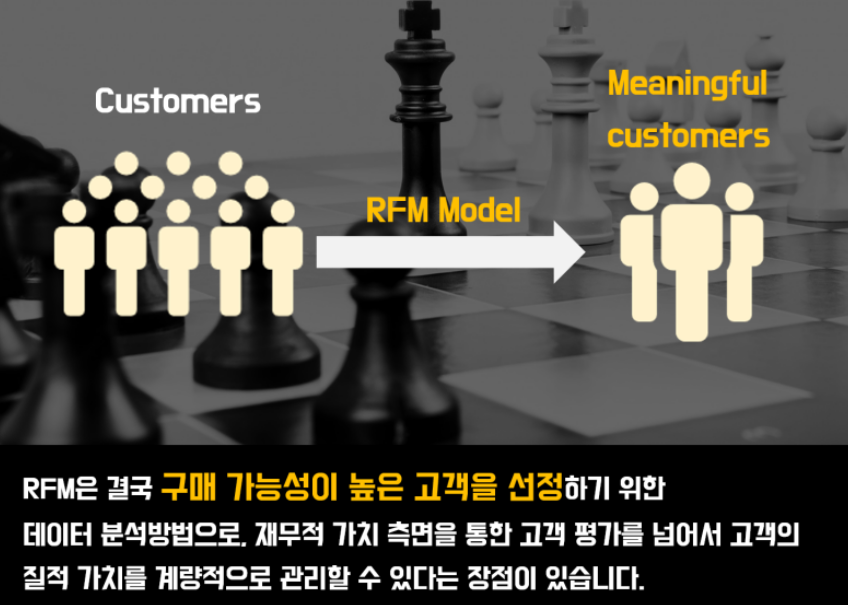
#####   
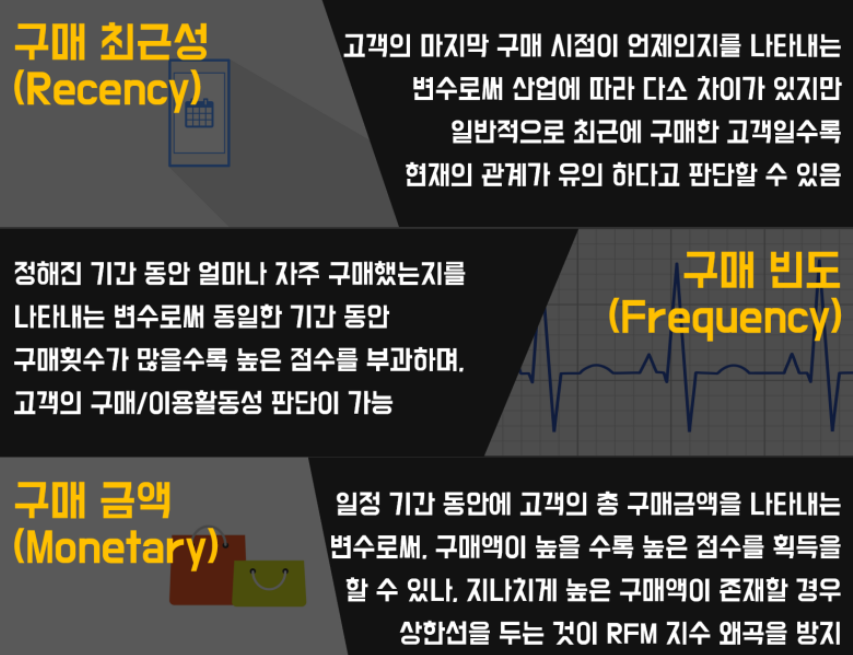

In [76]:
# Top 10 주문건수와 주문 금액을 가진 고객데이터 추출

print(df['아이디'].value_counts().sort_values(ascending = False)[:10])
print('= = ' * 20)
print(df.groupby('아이디')[ '구매건수'].max().sort_values(ascending = False)[:10])
print('= = ' * 20)
print(df.groupby('아이디')[ '주문품목 결제금액'].sum().sort_values(ascending = False)[:10])
print('= = ' * 20)


nh@fde74b0     1070
shenshop        133
nh@2851d86       68
nh@5fdacf4       53
nh@1ec4f         46
nh@448da452      40
j3heeya          37
ks@28231         33
ks@2517264       33
nh@e0ca          31
Name: 아이디, dtype: int64
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
아이디
nh@fde74b0     846
sojeong5892     67
jungliin        56
nh@5fdacf4      54
shenshop        23
nh@04231c       17
carries0714     17
nh@5fd568a2     15
pnh0716         15
ktkj1018        15
Name: 구매건수, dtype: int64
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
아이디
nh@fde74b0       32892960
shenshop         12679500
ksm001            1808100
jungliin          1143150
nh@1c960cd        1078300
nh@5fdacf4        1072960
nh@2851d86        1027450
nh@612b082         972600
naver29819937      861500
hawk700            832450
Name: 주문품목 결제금액, dtype: int64
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 


In [90]:
#DataFrame의 groupby()의 multiple 연산을 위해 agg()이용
# Recency는 주문일시 칼럼의 max() 에서 데이터 가공
# Frequency는 구매건수 칼럼의 max()에서 데어티 가공'
#  Monetary 는 주문품목 결제금액 칼럼의 sum()에서  데이터 가공

aggregations = {
    '주문일시' : 'max',
    '구매건수' : 'max',
    '주문품목 결제금액' : 'sum'
}

rfm_df = df.groupby('아이디').agg(aggregations)
rfm_df.head(3)

#  groupby 된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경

rfm_df = rfm_df.rename(columns = {'주문일시' : 'Recency',
                                                         '구매건수' : 'Frequency',
                                                         '주문품목 결제금액' : 'Monetary'})

rfm_df = rfm_df.reset_index()
rfm_df.head()

,아이디,Recency,Frequency,Monetary
0,0223cha@naver.com,2022-01-26 11:47:00,1,36600
1,0514lmy,2022-02-27 01:46:00,1,25800
2,0baltan,2022-04-25 08:26:00,2,33900
3,1004and,2022-05-18 13:57:00,8,406580
4,1204promise,2022-05-11 10:31:00,1,30300


In [91]:
#  Recency 컬럼 가공 방향 : 전체 파일 최근 거래 날짜에서 +1일을 기준 날짜로 설정. 
#### 이후 기준날짜에서 아이디 별 최근 날짜를 뺀 데이터에서  일자 데이터(days)만 추출 생성

import datetime as dt

rfm_df['Recency'] = dt.datetime(2022,7,1) - rfm_df['Recency']
rfm_df['Recency'] = rfm_df['Recency'].apply(lambda x: x.days+1)
print('= = ' * 20)
print('= = ' * 20)
print('rfm_df 의 행과 열의 수는 ? ', rfm_df.shape)
rfm_df.head()

= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
= = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = = 
rfm_df 의 행과 열의 수는 ?  (7017, 4)


,아이디,Recency,Frequency,Monetary
0,0223cha@naver.com,156,1,36600
1,0514lmy,124,1,25800
2,0baltan,67,2,33900
3,1004and,44,8,406580
4,1204promise,51,1,30300


##### RFM 데이터 시각화

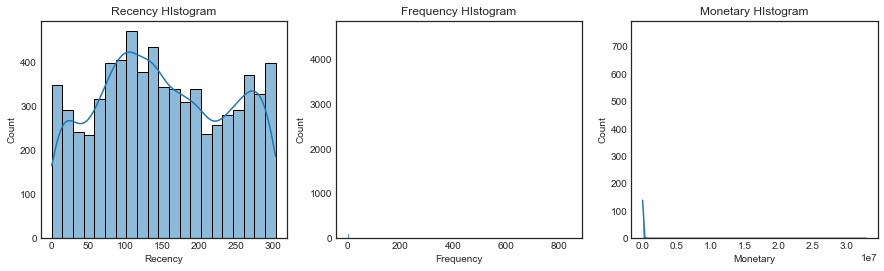

In [95]:
fig, axs = plt.subplots(1, 3, figsize = (15, 4))

sns.histplot(rfm_df.Recency, kde = True, ax = axs[0])
axs[0].set_title('Recency HIstogram')

sns.histplot(data = rfm_df, x = 'Frequency', ax = axs[1])
axs[1].set_title('Frequency HIstogram')

sns.histplot(rfm_df.Monetary, kde = True, ax = axs[2])
axs[2].set_title('Monetary HIstogram')

plt.show()

In [100]:
 rfm_df.describe()


,Recency,Frequency,Monetary
count,7017.000000,7017.000000,7.017000e+03
mean,151.997292,1.756734,7.445730e+04
std,85.717943,10.247269,4.257262e+05
min,1.000000,0.000000,4.900000e+02
25%,85.000000,1.000000,3.180000e+04
50%,144.000000,1.000000,4.860000e+04
75%,226.000000,2.000000,8.180000e+04
max,303.000000,846.000000,3.289296e+07


#### 군집분석

In [104]:
#  왜곡 정도가 매우 높은 데이터 세트에 k-means 을 적용하면, 중심의 개수를 증가키더라도 변별력이 떨어지는 군집화가 수행됨. 
# 데이터 세트를 StandardScaler로 평균과 표준편차를 재조정 후 k-means 평균 수행

# 실루엣 계수 시각화 함수

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

In [105]:
#  군집 갯수 별 시각화 함수

### 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

In [110]:
# Standard Scaler

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

scaler = StandardScaler()

X_features = rfm_df[['Recency', 'Frequency', 'Monetary']].values
X_features_scaled = scaler.fit_transform(X_features)

kmeans = KMeans(n_clusters = 3, random_state = 1111)
labels = kmeans.fit_predict(X_features_scaled)
rfm_df['gr_label'] = labels

print('실루엣 스코어 : {0:.4f}'. format(silhouette_score(X_features_scaled, labels)))

실루엣 스코어 : 0.5785


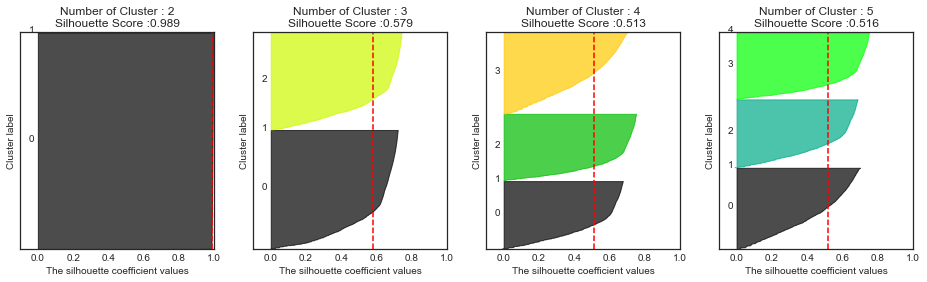

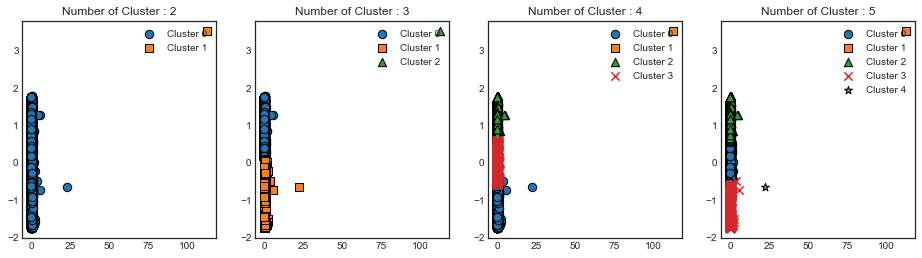

In [111]:
# Kmeans 군집 분석을 진행하였고, 피쳐는 표준화하였다
# 실루엣 스코어가 0.5785로 제법 좋은 수치로 나타났음

# 각 군집별 실루엣 스코어를 확인 

visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4,5], X_features_scaled)

In [117]:
rfm_df.head(10)
rfm_df['gr_label'].value_counts()
print(rfm_df.loc[rfm_df['gr_label']== 1])

             아이디  Recency  Frequency  Monetary  gr_label
6266  nh@fde74b0        3        846  32892960         1


###### 로그 변환 : 왜곡 정도를 낮추기 위해 피처 로그 변환을 적용할 필요

In [118]:

# 로그 변환
rfm_df['Recency_log'] = np.log1p(rfm_df['Recency'])
rfm_df['Frequency_log'] = np.log1p(rfm_df['Frequency'])
rfm_df['Monetary_log'] = np.log1p(rfm_df['Monetary'])

# StandardScaler
X_features = rfm_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled = StandardScaler().fit_transform(X_features)

# KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
rfm_df["gr_label"] = labels

# 실루엣 스코어
silhouette_kmeans = silhouette_score(X_features_scaled, labels)
print(f"실루엣 스코어: {silhouette_kmeans:.3f}")

실루엣 스코어: 0.277


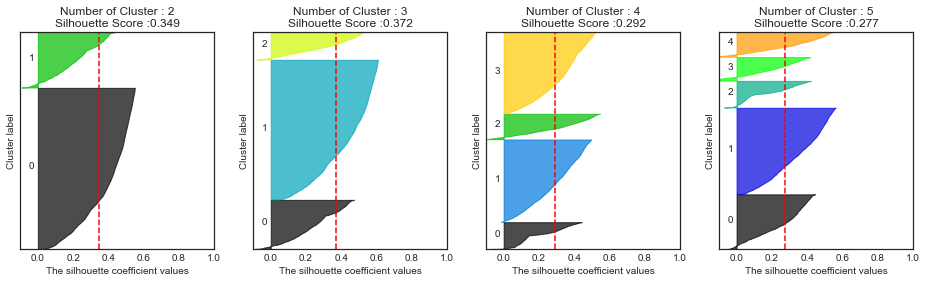

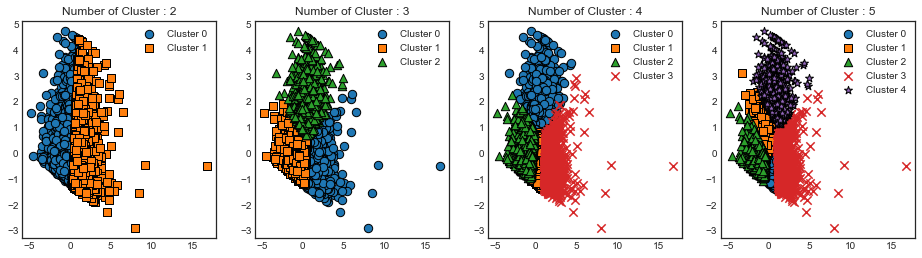

In [119]:
visualize_silhouette([2, 3, 4, 5], X_features_scaled)
visualize_kmeans_plot_multi([2, 3, 4,5], X_features_scaled)

In [120]:
rfm_df['gr_label'].value_counts()

1    2807
0    1780
2     865
4     798
3     767
Name: gr_label, dtype: int64

In [121]:
rfm_df.head(30)

,아이디,Recency,Frequency,Monetary,gr_label,Recency_log,Frequency_log,Monetary_log
0,0223cha@naver.com,156,1,36600,1,5.056246,0.693147,10.507831
1,0514lmy,124,1,25800,1,4.828314,0.693147,10.158169
2,0baltan,67,2,33900,1,4.219508,1.098612,10.431200
3,1004and,44,8,406580,2,3.806662,2.197225,12.915538
4,1204promise,51,1,30300,1,3.951244,0.693147,10.318936
5,1219kwon,163,1,72880,0,5.099866,0.693147,11.196583
6,2002mina,31,1,43800,4,3.465736,0.693147,10.687412
7,2023ing,277,1,193200,0,5.627621,0.693147,12.171486
8,21lsbok,270,2,32690,1,5.602119,1.098612,10.394855
9,22yun,103,4,39800,2,4.644391,1.609438,10.591647


In [122]:
rfm_df.to_csv('C:/Users/junoh/OneDrive/이너피플/두두월드/Clustering_thru_RFM_두두_220918.csv', encoding = 'utf-8-sig')